In [1]:
from IMPORTS import *

seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounte

Reading ATE JSON Files

In [2]:
ATE_train = None
ATE_test = None
ATE_val = None
with open("Task1\processed\ATE_train.json") as f1:
    ATE_train  = json.load(f1)

with open("Task1\processed\ATE_test.json") as f2:
    ATE_test = json.load(f2)

with open("Task1\processed\ATE_val.json") as f3:
    ATE_val = json.load(f3)


Reading NER JSON Files

In [3]:
# NER_train = None
# NER_test = None
# NER_val = None
# with open("Task1\processed\\NER_train.json") as f1:
#     NER_train  = json.load(f1)

# with open("Task1\processed\\NER_test.json") as f2:
#     NER_test = json.load(f2)

# with open("Task1\processed\\NER_val.json") as f3:
#     NER_val = json.load(f3)


ATE_Dataset

In [4]:
X_train_ate,Y_train_ate= create_train_test_val(ATE_train)
X_test_ate,Y_test_ate = create_train_test_val(ATE_test)
X_val_ate,Y_val_ate = create_train_test_val(ATE_val)


In [5]:
s=set()
for i in Y_test_ate:
    s.update(set(i))
s

{'B', 'I', 'O'}

NER_Dataset

In [6]:
# X_train_ner,Y_train_ner = create_train_test_val(NER_train)
# X_test_ner,Y_test_ner = create_train_test_val(NER_test)
# X_val_ner,Y_val_ner = create_train_test_val(NER_val)


Loading Word2Vec

In [7]:
word2vec = KeyedVectors.load_word2vec_format('WordEmbeddings/Word2Vec.bin',binary=True)

Tokenizing

In [8]:

X_train_ate_tokenized, toke = TokenCreator(X_train_ate,1)
X_test_ate_tokenized = TokenCreator(X_test_ate,0,tokenizer = toke)
X_val_ate_tokenized = TokenCreator(X_val_ate,0,tokenizer = toke)

Y_train_ate_tokenized,toke2 = TokenCreator(Y_train_ate,0)
Y_test_ate_tokenized = TokenCreator(Y_test_ate,0,tokenizer = toke2)
Y_val_ate_tokenized = TokenCreator(Y_val_ate,0,tokenizer = toke2)

print(X_val_ate_tokenized)


[[19, 2, 2026, 4, 355, 458, 33, 1, 19, 10, 1, 1, 1, 132, 31, 16, 86, 165, 306, 76, 2, 1391, 907, 383, 16, 104, 6, 4, 80, 6, 321, 4, 649, 2, 1, 5, 25, 6, 42, 22, 1, 1, 37, 3], [17, 29, 900, 161, 1, 5, 56, 110, 9, 27, 41], [621, 848, 2212, 23, 2, 784, 2303, 580, 2, 87, 53, 5, 2, 24, 1699, 266, 3], [2, 374, 14, 16, 55, 641, 207, 196, 2348, 21, 46, 10, 343, 1, 2, 325, 11, 17, 121, 3], [6, 1087, 105, 5, 48, 6, 91, 6, 43, 869, 223, 3], [6, 43, 31, 95, 356, 7, 441, 305, 2, 190, 87, 4, 7, 245, 622, 4, 5, 6, 174, 10, 183, 316, 41], [8, 114, 177, 2, 269, 757, 274, 262, 9, 71, 3], [2, 34, 54, 369, 7, 38, 22, 71, 4, 5, 26, 35, 81, 346, 13, 6, 3], [1, 21, 2, 1047, 125, 2222, 23, 8, 108, 20, 771, 19, 662, 394, 1090, 1, 3], [61, 76, 10, 287, 8, 489, 189, 6, 117, 5, 18, 453, 14, 2, 333, 35, 408, 5, 31, 28, 416, 10, 94, 333, 3], [6, 18, 223, 4, 1720, 53, 4, 5, 44, 35, 335, 166, 61, 51, 265, 141, 41], [341, 4, 2, 24, 18, 244, 463, 4, 208, 501, 57, 2, 506, 29, 4, 5, 18, 263, 1, 1, 19, 25, 3], [63, 9, 27,

In [9]:
# X_train_ner_tokenized, toke = TokenCreator(X_train_ner,1)
# X_test_ner_tokenized = TokenCreator(X_test_ner,0,tokenizer = toke)
# X_val_ner_tokenized = TokenCreator(X_val_ner,0,tokenizer = toke)

# Y_train_ner_tokenized,toke2 = TokenCreator(Y_train_ner,0)
# Y_test_ner_tokenized = TokenCreator(Y_test_ner,0,tokenizer = toke2)
# Y_val_ner_tokenized = TokenCreator(Y_val_ner,0,tokenizer = toke2)

# print(X_val_ner_tokenized)

Forming the vocabulary


In [10]:
st1 = find_vocab(X_train_ate_tokenized)
vocab_size_ate  = len(st1) + 1 
vocab_size_ate

2406

In [11]:
# st2 = find_vocab(X_train_ner_tokenized)
# vocab_size_ner = len(st2) + 1
# vocab_size_ner

Initializing weights

In [12]:
weights_ate = np.zeros((vocab_size_ate, 300))

mapping_ate = toke.word_index 
mapping_ate

{'#UK': 1,
 'the': 2,
 '.': 3,
 ',': 4,
 'and': 5,
 'it': 6,
 'to': 7,
 'i': 8,
 'is': 9,
 'a': 10,
 'of': 11,
 'for': 12,
 'with': 13,
 'that': 14,
 'my': 15,
 'you': 16,
 'this': 17,
 'was': 18,
 'in': 19,
 'not': 20,
 'on': 21,
 'very': 22,
 'but': 23,
 'computer': 24,
 'use': 25,
 'have': 26,
 'great': 27,
 'they': 28,
 'laptop': 29,
 "n't": 30,
 'so': 31,
 'has': 32,
 'are': 33,
 'battery': 34,
 'had': 35,
 'screen': 36,
 ')': 37,
 'be': 38,
 'as': 39,
 'all': 40,
 '!': 41,
 '(': 42,
 "'s": 43,
 'also': 44,
 'me': 45,
 'just': 46,
 'easy': 47,
 'when': 48,
 'at': 49,
 'or': 50,
 'only': 51,
 'which': 52,
 'up': 53,
 'life': 54,
 'can': 55,
 'windows': 56,
 'than': 57,
 'out': 58,
 'if': 59,
 'do': 60,
 'after': 61,
 'more': 62,
 'keyboard': 63,
 'would': 64,
 'drive': 65,
 'hard': 66,
 'price': 67,
 'from': 68,
 'well': 69,
 'because': 70,
 'good': 71,
 'one': 72,
 'an': 73,
 'like': 74,
 'mac': 75,
 'about': 76,
 'quality': 77,
 'its': 78,
 'love': 79,
 'get': 80,
 'no': 81,
 'so

In [13]:
# weights_ner = np.zeros((vocab_size_ner, 300))

# mapping_ner = toke.word_index 
# mapping_ner

Creating weights.

In [14]:
for word, index in mapping_ate.items():
    if word in word2vec:
        weights_ate[index:] = word2vec[word]
        

In [15]:
# for word, index in mapping_ner.items():
#     if word in word2vec:
#         weights_ner[index:] = word2vec[word]

In [33]:
max_len=0
for i in X_train_ate_tokenized:
    max_len = max(max_len,len(i))

max_len


78

Padding the datasets.

In [34]:
X_padded_train = pad_sequences(X_train_ate_tokenized, maxlen=max_len, padding="pre", truncating="post")
Y_padded_train = pad_sequences(Y_train_ate_tokenized, maxlen=max_len, padding="pre", truncating="post")

X_padded_test = pad_sequences(X_test_ate_tokenized, maxlen=max_len, padding="pre", truncating="post")
Y_padded_test = pad_sequences(Y_test_ate_tokenized, maxlen=max_len, padding="pre", truncating="post")

X_padded_val = pad_sequences(X_val_ate_tokenized, maxlen=max_len, padding="pre", truncating="post")
Y_padded_val = pad_sequences(Y_val_ate_tokenized, maxlen=max_len, padding="pre", truncating="post")        

In [17]:
# X_padded_train_ner = pad_sequences(X_train_ner_tokenized, maxlen=100, padding="pre", truncating="post")
# Y_padded_train_ner = pad_sequences(Y_train_ner_tokenized, maxlen=100, padding="pre", truncating="post")

# X_padded_test_ner = pad_sequences(X_test_ner_tokenized, maxlen=100, padding="pre", truncating="post")
# Y_padded_test_ner = pad_sequences(Y_test_ner_tokenized, maxlen=100, padding="pre", truncating="post")

# X_padded_val_ner = pad_sequences(X_val_ner_tokenized, maxlen=100, padding="pre", truncating="post")
# Y_padded_val_ner = pad_sequences(Y_val_ner_tokenized, maxlen=100, padding="pre", truncating="post")  

One-hot encoding the labels.

In [35]:
Y_padded_train = to_categorical(Y_padded_train)
Y_padded_test = to_categorical(Y_padded_test)
Y_padded_val = to_categorical(Y_padded_val)

print(Y_padded_train.shape)
print(X_padded_train.shape)


(906, 78, 4)
(906, 78)


In [19]:
# Y_padded_train_ner = to_categorical(Y_padded_train_ner)
# Y_padded_test_ner = to_categorical(Y_padded_test_ner)
# Y_padded_val_ner = to_categorical(Y_padded_val_ner)

# print(Y_padded_train_ner.shape)
# print(X_padded_train_ner.shape)

<a href="https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/"> Reference </a>

BILSTM-CRF Model

ATE

In [41]:
input=Input(shape=(max_len,))
BiLSTM_CRF_embed=Embedding(input_dim=vocab_size_ate, output_dim=300, input_length=max_len, weights=[weights_ate], trainable=False)(input)
BiLSTM_CRF_bilstm=Bidirectional(LSTM(units=128, return_sequences=True, recurrent_dropout=0.1))(BiLSTM_CRF_embed)
BiLSTM_CRF_model=(TimeDistributed(Dense(Y_padded_test.shape[2], activation='relu')))(BiLSTM_CRF_bilstm)

crf = CRF(Y_padded_test.shape[2])
predicted_sequence, potentials, sequence_length, crf_kernel = crf(BiLSTM_CRF_model)

BiLSTM_CRF_model=Model(input,potentials)

In [42]:
BiLSTM_CRF_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 78)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 78, 300)           721800    
                                                                 
 bidirectional_2 (Bidirecti  (None, 78, 256)           439296    
 onal)                                                           
                                                                 
 time_distributed_2 (TimeDi  (None, 78, 4)             1028      
 stributed)                                                      
                                                                 
 crf_2 (CRF)                 [(None, 78),              44        
                              (None, 78, 4),                     
                              (None,),                     

In [43]:
BiLSTM_CRF_model.compile(
        optimizer=AdamW(learning_rate=0.002),
        loss=SigmoidFocalCrossEntropy(),
        metrics=['accuracy']
    )

In [44]:
BiLSTM_CRF_f1_callback_val = F1ScoreCallback(data=(X_padded_val, Y_padded_val),name='valindation')
BiLSTM_CRF_f1_callback_train=F1ScoreCallback(data=(X_padded_train, Y_padded_train),name='training')

Training the GRU Model

In [45]:
BiLSTM_CRF_training = BiLSTM_CRF_model.fit(X_padded_train, Y_padded_train, batch_size=128, epochs=10, validation_data=(X_padded_val, Y_padded_val), callbacks=[BiLSTM_CRF_f1_callback_val,BiLSTM_CRF_f1_callback_train])

Epoch 1/10


7/7 [==============================] - 1s 24ms/stepss: 0.8961 - accuracy: 
valindation F1 Score: 0.4733896873843267
29/29 [==============================] - 1s 24ms/step
training F1 Score: 0.4728874336058015
8/8 [==============================] - 11s 730ms/step - loss: 0.8961 - accuracy: 0.4611 - val_loss: 0.3648 - val_accuracy: 0.9066
Epoch 2/10
7/7 [==============================] - 0s 25ms/stepss: 0.2843 - accuracy: 
valindation F1 Score: 0.5118061098840403
29/29 [==============================] - 1s 25ms/step
training F1 Score: 0.512750510310274
8/8 [==============================] - 4s 501ms/step - loss: 0.2843 - accuracy: 0.9578 - val_loss: 0.2235 - val_accuracy: 0.9708
Epoch 3/10
7/7 [==============================] - 0s 25ms/stepss: 0.2031 - accuracy: 
valindation F1 Score: 0.5093292792241236
29/29 [==============================] - 1s 23ms/step
training F1 Score: 0.5040361858388595
8/8 [==============================] - 4s 519ms/step - loss: 0.2031 - accuracy: 0.9701 - val_los

In [46]:
accuracy = BiLSTM_CRF_model.evaluate(X_padded_test, Y_padded_test, verbose = 1)
print(accuracy)

11/11 [==============================] - 0s 25ms/step - loss: 0.0781 - accuracy: 0.9739
[0.07814362645149231, 0.9739290475845337]


Graphs

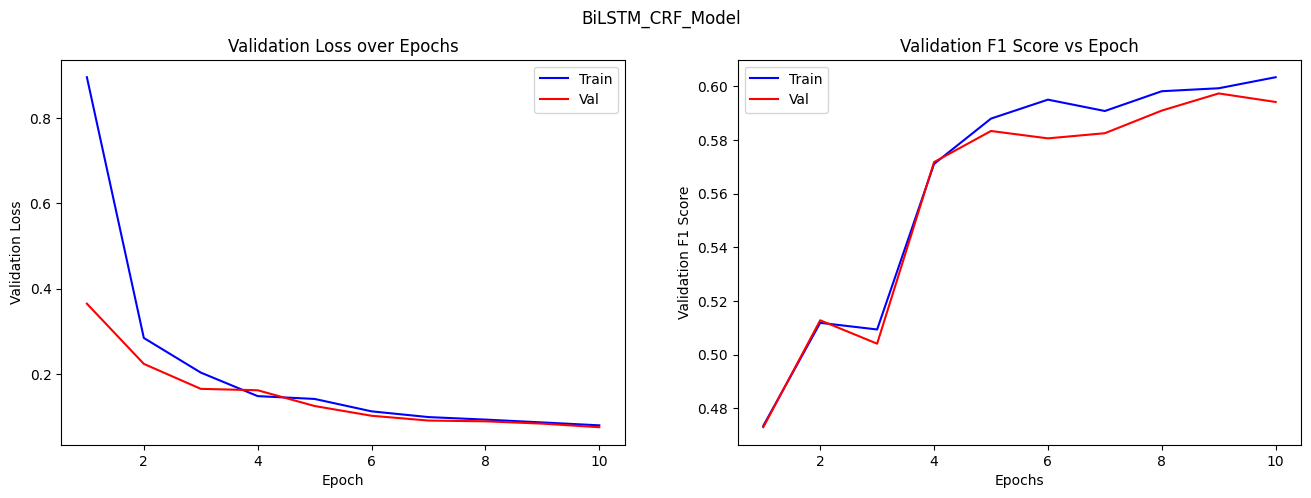

In [47]:
model_name="BiLSTM_CRF"
Embedding_name="word2vec"
draw_loss_graph(BiLSTM_CRF_training, f"{model_name}_Model", BiLSTM_CRF_f1_callback_val.f1_scores, BiLSTM_CRF_f1_callback_train.f1_scores)
save_model(BiLSTM_CRF_model, model_name,Embedding_name,"t2","ATE")


In [48]:
loaded_model = load_model(f"Saved_Models/ATE/t2_{model_name}_{Embedding_name}.pkl")

In [49]:
Y_pred_ate = loaded_model.predict(X_padded_test)
real = get_real(Y_padded_test)

# for i in range(len(real)):
#     for j in range(len(real[i])):
#         if real[i][j]==0:
#             real[i][j]=1

pred = get_pred(Y_pred_ate)

# for i in range(len(pred)):
#     for j in range(len(pred[i])):
#         if pred[i][j]==0:
#             pred[i][j]=1

f1= scikitf1(real,pred)
print("Test F1: ",f1)


11/11 [==============================] - 1s 27ms/step
Test F1:  0.6066235321802989


In [50]:
dic ={}
for i in real:
    for j in i:
        if j in dic:
            dic[j]+=1
        else:
            dic[j]=1
        
dic


{0: 20413, 2: 437, 3: 227, 1: 4507}

In [51]:

dic2 ={}
for i in pred:
    for j in i:
        if j in dic2:
            dic2[j]+=1
        else:
            dic2[j]=1

dic2

{0: 20465, 2: 541, 1: 4577, 3: 1}

In [52]:
my_f1(real,pred)

0.9987279221096923 {0, 1, 2, 3}
0.9390136503742845 {0, 1, 2, 3}
0.4887525562372188 {0, 1, 2, 3}
0 {0, 1, 2, 3}


0.6066235321802989